<a href="https://colab.research.google.com/github/Lucasiago2022/Atividades-realizadas-em-Sala---Google-Colab/blob/main/C%C3%B3pia_de_Aula_5_Introdu%C3%A7%C3%A3o_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação Unidade 3  - Análise de dados 




#Introdução


O presente relatório tem o seguinte tema:

**Análise histórica de Todos os Campeões do Campeonato Brasileiro Serie A até 2019**

Para isso, utilizou o base de dados os passageiros do titanic presente no kaggle (https://www.kaggle.com/datasets/ravels1991/campees-do-campeonato-brasileiro-de-futebol?select=campoes_brasileiro.csv). 

Dessa forma, o objetivo desse relatório é responder as seguintes perguntas:


*   Qual o maior campeão?
*   Qual o maior artilheiro?
*   A variável **Artileiro** contribuiu para o titulo?






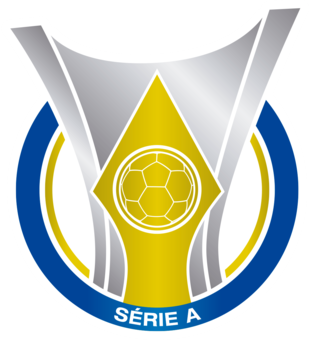

# Desenvolvimento

## Leitura do banco de dados e primeiras observações

In [18]:
#Importar as bibliotecas que serão utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st


In [19]:
#Ler um arquivo em formato csv e salvar na variavel dados 
dados = pd.read_csv('campoes_brasileiro.csv')

In [20]:
#Ler as informações de cima do banco de dados
dados.head()

,Ano,Vencedor,Vice,Terceiro colocado,Quarto colocado,Artilheiros,Gols
0,1959,Bahia,Santos,Grêmio,Vasco da Gama,Léo Briglia (Bahia),8
1,1960,Palmeiras,Fortaleza,Fluminense,Santa Cruz,Bececê (Fortaleza),7
2,1961,Santos,Bahia,America,Náutico,Pelé (Santos),7
3,1962,Santos,Botafogo,Internacional,Sport,Coutinho (Santos),7
4,1963,Santos,Bahia,Grêmio,Botafogo,Pelé (Santos),8


In [21]:
#Ler as informações de baixo do banco de dados
dados.tail()

,Ano,Vencedor,Vice,Terceiro colocado,Quarto colocado,Artilheiros,Gols
58,2015,Corinthians,Atlético Mineiro,Grêmio,São Paulo,Ricardo Oliveira (Santos),20
59,2016,Palmeiras,Santos,Flamengo,Atlético Mineiro,William Pottker (Ponte Preta) Diego Souza (Sp...,14
60,2017,Corinthians,Palmeiras,Santos,Grêmio,Henrique Dourado (Fluminense) Jô (Corinthians),18
61,2018,Palmeiras,Flamengo,Internacional,Grêmio,Gabriel (Santos),18
62,2019,Flamengo,Santos,Palmeiras,Grêmio,Gabriel (Flamengo),25


In [22]:
#Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ano                63 non-null     int64 
 1   Vencedor           63 non-null     object
 2   Vice               63 non-null     object
 3   Terceiro colocado  63 non-null     object
 4   Quarto colocado    63 non-null     object
 5   Artilheiros        63 non-null     object
 6   Gols               63 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 3.6+ KB


## Limpeza do banco de dados

Uma vez que o objetivo é analisar variaveis envolvendo o G4 do brasileirão e os artilheiros de todas as edições, não será necessário excluir nenhuma variável.

Como não foi realizada a retirada das colunas, pode-se começar a análise.


## Análise Descritiva dos Dados

In [23]:
#Estatísticas dos dados
dados.describe()

,Ano,Gols
count,63.000000,63.000000
mean,1988.317460,17.253968
std,17.873052,6.177400
min,1959.000000,7.000000
25%,1972.500000,13.500000
50%,1988.000000,18.000000
75%,2003.500000,21.000000
max,2019.000000,34.000000


Como pode ser observado, a média de gols dos artilheiros ficou por volta de 17 gols por temporada. 
O maior número de gols marcados por um artilheiro foi 34 gols, já o artilheiro com menos gols da história do campeonato marcou apenas 7 gols.

In [46]:
#Analisando os times que mais vezes foram campeões


print(dados.Vencedor.value_counts())



Palmeiras        10
Santos            8
Corinthians       7
São               6
Flamengo          6
Cruzeiro          4
Fluminense        4
Vasco             4
Internacional     3
Bahia             2
Botafogo          2
Atlético          2
Grêmio            2
Guarani           1
Coritiba          1
Sport             1
Name: Vencedor, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


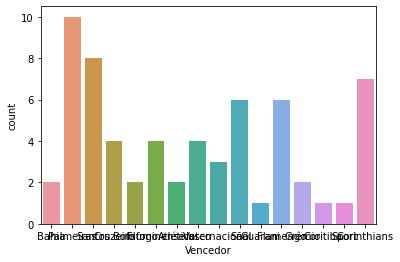

In [25]:
c = sns.countplot(dados.Vencedor)
plt.gca()

Segundo o gráfico 1, percebe-se que o maior campeão do Campeonato Brasileiro é o Palmeiras.

Seguido pelo Santos, Corinthians e depois pelo São Paulo, demonstrando a força do Futebol paulista no Brasil.

In [45]:
#Analisando os times que mais vezes foram vices-campeões
print(dados.Vice.value_counts())

Santos                 8
Internacional          6
São Paulo              6
Atlético Mineiro       5
Cruzeiro               5
Palmeiras              4
Vasco da Gama          4
Grêmio                 3
Corinthians            3
Botafogo               3
Fortaleza              2
Flamengo               2
Bahia                  2
Guarani                2
São Caetano            2
Náutico                1
Bangu                  1
Bragantino             1
Vitória                1
Portuguesa             1
Atlético Paranaense    1
Name: Vice, dtype: int64


Text(0, 0.5, 'Ano')

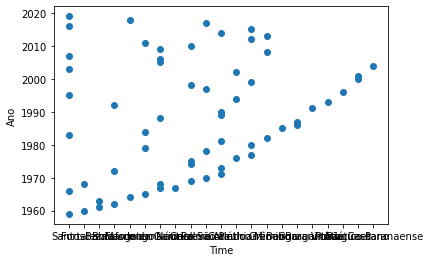

In [47]:
plt.scatter(dados.Vice, dados.Ano) 
plt.xlabel('Time')
plt.ylabel('Ano')

De acordo com o Gráfico 2, nota-se a equipe que mais ficou em segundo lugar é o Santos. Com 8 vices campeonatos. 

In [33]:
#Analise dos Artilheiros
print(dados.Artilheiros.value_counts())

Pelé (Santos)                                                                   3
Roberto Dinamite (Vasco da Gama)                                                2
Fred (Fluminense)                                                               2
Zico (Flamengo)                                                                 2
Romário (Vasco da Gama)                                                         2
Washington (Atlético Paranaense)                                                1
Guga (Santos)                                                                   1
Amoroso (Guarani) Túlio (Botafogo)                                              1
Túlio (Botafogo)                                                                1
Paulo Nunes (Grêmio) Renaldo (Atlético Mineiro)                                 1
Edmundo (Vasco da Gama)                                                         1
Viola (Santos)                                                                  1
Guilherme (Atlét

Text(0, 0.5, 'Ano')

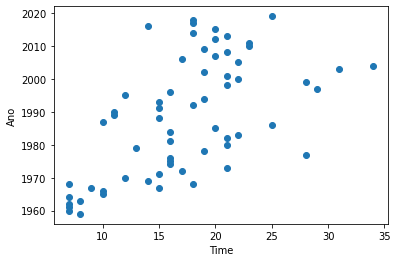

In [35]:
plt.scatter(dados.Gols, dados.Ano) 
plt.xlabel('Time')
plt.ylabel('Ano')

Com base no gráfico 3, constata-se que o Pelé foi o jogador que por mais vezes foi artilheiro do campeonato brasileiro, com três conquistas.



In [64]:
x = [dados.Gols]
y = [dados.Artilheiros]
print(x + y)

[0      8
1      7
2      7
3      7
4      8
      ..
58    20
59    14
60    18
61    18
62    25
Name: Gols, Length: 63, dtype: int64, 0                                   Léo Briglia (Bahia)
1                                    Bececê (Fortaleza)
2                                         Pelé (Santos)
3                                     Coutinho (Santos)
4                                         Pelé (Santos)
                            ...                        
58                            Ricardo Oliveira (Santos)
59    William Pottker (Ponte Preta)  Diego Souza (Sp...
60     Henrique Dourado (Fluminense)   Jô (Corinthians)
61                                     Gabriel (Santos)
62                                   Gabriel (Flamengo)
Name: Artilheiros, Length: 63, dtype: object]


In [ ]:
#Correlação entre as variáveis
dados.corr()

,Ano,Gols
Ano,1.000000,0.594406
Gols,0.594406,1.000000


# Conclusão

Ao realizar o estudo dos dados, constatou-se que a equipe brasileira com mais titulos do Campeonato brasileiro até 2019 é o Palmeiras com 10 titlos. I. Em seguida aparece a equipe do Santos.
Corinthians e São Paulo fecham o top 4 da lista de Campeões, com 7 e 6 titluos respectivamente. Uma curiosidade é que o São Paulo é a única equipe do Futebol Brasileiro que conseguiu conquistar 3 titulos nacionais de maneira consecutiva.
Com os resultados encontrados, pode-se concluir que o Futebol paulista domina o futebol nacional.

Em relação aos artilheiros, em média os artilheiros fizeram 17 gols por campeonato. O jogador Pelé o Rei do Futebol demonstra mais uma vez o porque da sua Majestade, foi artilheiro do campeonato em três oportuniades ajudando a sua Equipe o Santos.

## Limitações


Com relação aos dados analisados, ocorreram limitações sobre algumas variaveis:

* Faltam variavéis para o estudo, como o numero de gols marcados pelas equipes, o numero de vitorias, derrotas e empates na campanha.
Dados que complementariam a analise.

## Referências


https://www.kaggle.com/datasets/ravels1991/campees-do-campeonato-brasileiro-de-futebol?select=campoes_brasileiro.csv